<h2>Import Libaries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Import datasets</h2>

In [2]:
train_data_path = "D:/Machine learning project/Credit Card Fraud detection/Dataset/fraudTrain.csv"
test_data_path = "D:/Machine learning project/Credit Card Fraud detection/Dataset/fraudTest.csv"

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<h2>Data Preprocessing</h2>

In [5]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [6]:
train_data.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [7]:
test_data.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [8]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [9]:
train_data.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [10]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])
test_data.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


<h2>Data Visualization</h2>

<Axes: >

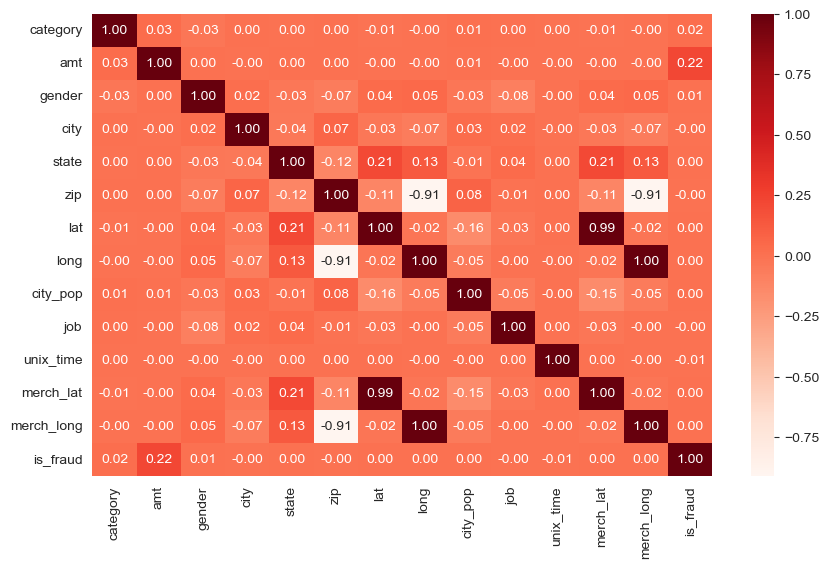

In [25]:
plt.figure(figsize = (10,6))
sns.heatmap(train_data.corr(), cmap = "Reds", annot = True, fmt = ".2f")

<Axes: xlabel='gender', ylabel='count'>

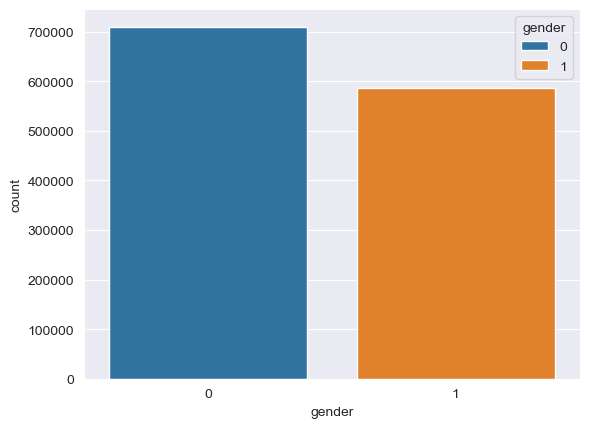

In [12]:
sns.set_style("darkgrid")
sns.countplot(data = train_data, x = "gender", hue = "gender")

<h2>Train the Model</h2>

In [13]:
y_train = train_data["is_fraud"]
x_train = train_data.drop(["is_fraud"], axis = 1)
y_test = test_data["is_fraud"]
x_test = test_data.drop(["is_fraud"], axis = 1)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296675, 13), (555719, 13), (1296675,), (555719,))

<h2>Decision Tree</h2>

In [15]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_test, y_test)

(0.9968920508222955, 0.9974933374601193)

0.6614823815309842


<Axes: >

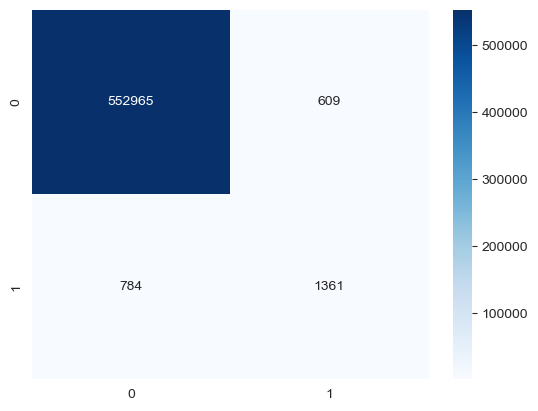

In [16]:
cf = confusion_matrix(y_test, dtc.predict(x_test))
print(f1_score(y_test, dtc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

<h2>Naive Bayes Model</h2>

In [17]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train), gnb.score(x_test, y_test)

(0.990373840785085, 0.9922568780264847)

0.0


<Axes: >

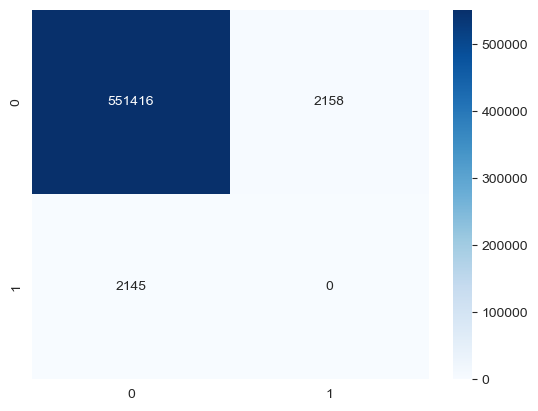

In [18]:
cf = confusion_matrix(y_test, gnb.predict(x_test))
print(f1_score(y_test, gnb.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

<h2>Random Forest Model</h2>

In [19]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.9998858619160546, 0.9971172481056073)

0.5171790235081374


<Axes: >

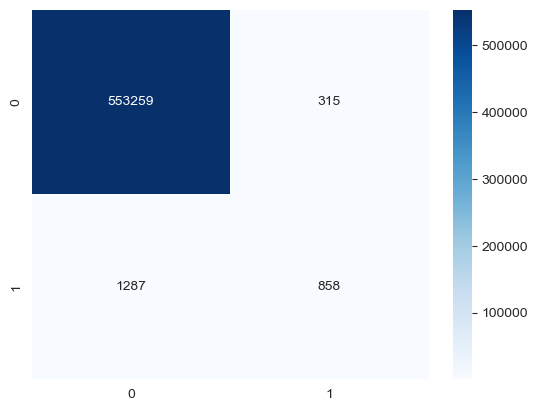

In [20]:
cf = confusion_matrix(y_test, rfc.predict(x_test))
print(f1_score(y_test, rfc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

<h2>KNeighbors Model</h2>

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.9958671216765959, 0.9961401355721147)

0.0


<Axes: >

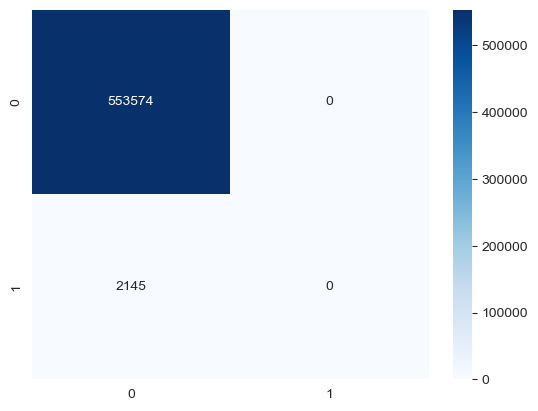

In [22]:
cf = confusion_matrix(y_test, knn.predict(x_test))
print(f1_score(y_test, knn.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")